In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('Advertising.csv')
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [9]:
x = data[['TV', 'radio', 'newspaper']]
y = data['sales']

model = LinearRegression()
model.fit(x, y)
m = model.coef_[0]
b = model.intercept_
print(m, b)

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print(r2)

0.04576464545539761 2.9388893694594085
0.8972106381789522


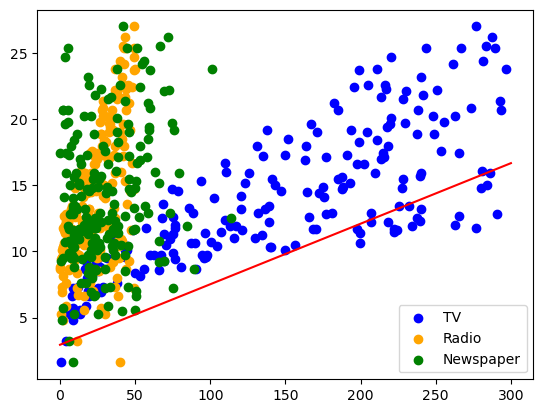

In [23]:
plt.scatter(data['TV'], data['sales'], color='blue', label='TV')
plt.scatter(data['radio'], data['sales'], color='orange', label='Radio')
plt.scatter(data['newspaper'], data['sales'], color='green', label='Newspaper')
plt.legend()
x_line = np.linspace(0, 300, 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label='Regression Line')

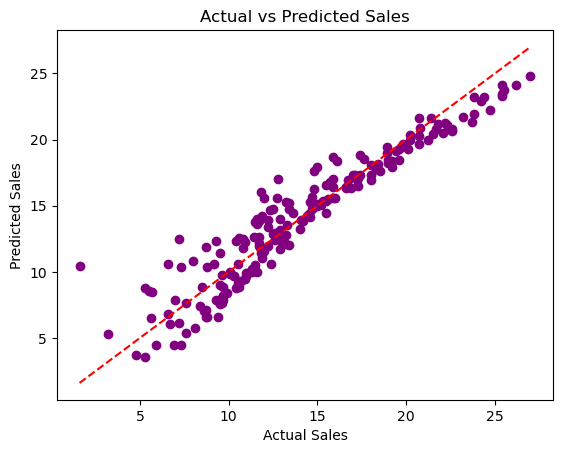

In [17]:
import matplotlib.pyplot as plt

y_pred = model.predict(x)

plt.scatter(y, y_pred, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()


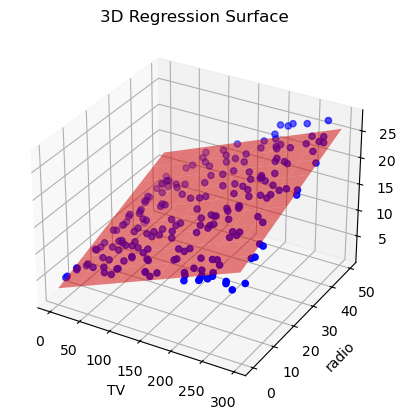

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['TV'], data['radio'], y, c='blue', label='Actual')

# Create a prediction surface
tv_range = np.linspace(data['TV'].min(), data['TV'].max(), 10)
radio_range = np.linspace(data['radio'].min(), data['radio'].max(), 10)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)
sales_pred = model.intercept_ + model.coef_[0]*tv_grid + model.coef_[1]*radio_grid

ax.plot_surface(tv_grid, radio_grid, sales_pred, color='red', alpha=0.5)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('Sales')
plt.title("3D Regression Surface")
plt.show()


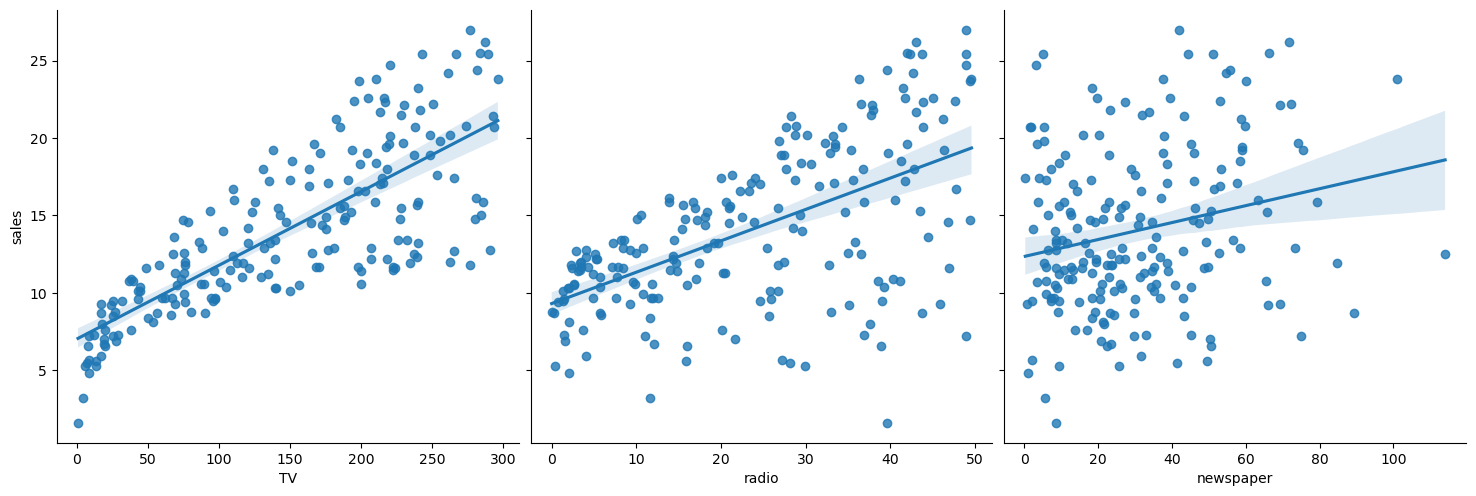

In [22]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=1, kind='reg')